In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
archivos = [
    "../data/data_models/logistic_regression.csv",
    "../data/data_models/SMV.csv",
    "../data/data_models/knn.csv",
    "../data/data_models/balanced_decision_forest.csv",
    "../data/data_models/red_neuronal.csv"
]

archivos_disponibles = []
for archivo in archivos:
    try:
        pd.read_csv(archivo)
        archivos_disponibles.append(archivo)
    except FileNotFoundError:
        print(f"No encontrado: {archivo}")

print(f"\nArchivos encontrados: {len(archivos_disponibles)}")


dfs = []
for archivo in archivos_disponibles:
    df = pd.read_csv(archivo)
    dfs.append(df)

comparacion = pd.concat(dfs, ignore_index=True)


Archivos encontrados: 5


In [3]:
print(comparacion.to_string(index=False))

                  Modelo  BA Train    BA CV  BA Test
     Logistic regression  0.527378 0.523217 0.494334
                     SVM  0.509800 0.501200 0.537600
                     KNN  0.990063 0.395228 0.394795
Balanced Decision Forest  0.570369 0.525200 0.470964
        Red Neuronal MLP  0.386501 0.389275 0.388096


In [7]:
comparacion['Gap_Train_CV'] = comparacion['BA Train'] - comparacion['BA CV']
comparacion['Gap_CV_Test'] = comparacion['BA CV'] - comparacion['BA Test']

# 6. Ordenar por mejor BA Test (CON ESPACIO)
comparacion_ordenada = comparacion.sort_values('BA Test', ascending=False)
print(comparacion_ordenada[['Modelo', 'BA Test']].to_string(index=False))

                  Modelo  BA Test
                     SVM 0.537600
     Logistic regression 0.494334
Balanced Decision Forest 0.470964
                     KNN 0.394795
        Red Neuronal MLP 0.388096


In [10]:
mejor_modelo = comparacion_ordenada.iloc[0]['Modelo']
mejor_ba = comparacion_ordenada.iloc[0]['BA Test']

print(f"\nMEJOR MODELO: {mejor_modelo}")
print(f"Balanced Accuracy (Test): {mejor_ba:.4f}")


MEJOR MODELO: SVM
Balanced Accuracy (Test): 0.5376


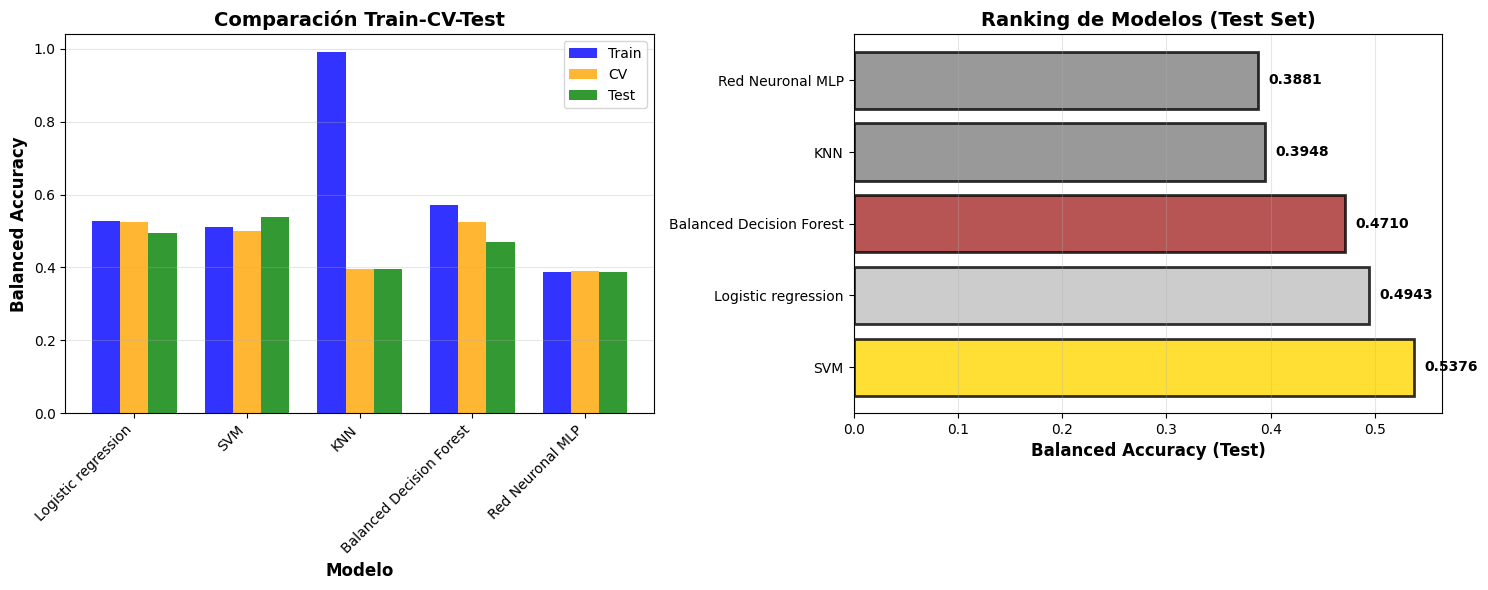

In [12]:
# 8. Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Barras comparativas Train-CV-Test
x = range(len(comparacion))
width = 0.25

axes[0].bar([i - width for i in x], comparacion['BA Train'], 
            width, label='Train', alpha=0.8, color='blue')
axes[0].bar(x, comparacion['BA CV'], 
            width, label='CV', alpha=0.8, color='orange')
axes[0].bar([i + width for i in x], comparacion['BA Test'], 
            width, label='Test', alpha=0.8, color='green')

axes[0].set_xlabel('Modelo', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Balanced Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Comparación Train-CV-Test', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparacion['Modelo'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Gráfico 2: Solo Test (ranking)
colores = ['gold' if i == 0 else 'silver' if i == 1 else 'brown' if i == 2 else 'gray' 
           for i in range(len(comparacion_ordenada))]

axes[1].barh(comparacion_ordenada['Modelo'], comparacion_ordenada['BA Test'], 
             color=colores, alpha=0.8, edgecolor='black', linewidth=2)
axes[1].set_xlabel('Balanced Accuracy (Test)', fontsize=12, fontweight='bold')
axes[1].set_title('Ranking de Modelos (Test Set)', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Valores en las barras
for i, (modelo, ba) in enumerate(zip(comparacion_ordenada['Modelo'], 
                                      comparacion_ordenada['BA Test'])):
    axes[1].text(ba + 0.01, i, f'{ba:.4f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()